### Import the libraries

In [1]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') 
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nasim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nasim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nasim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nasim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\nasim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### 1. Load the scarped data

In [3]:
myfile = open('20th_century_wiki.txt', encoding='utf-8') 

In [4]:
# Import txt file

with open('20th_century_wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

### 2. Tokenize the words from the text and create a bar chart to plot the 10 most common word

In [7]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)

# print the first 30 tokens
print(tokenized_word [:30])

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog']


In [8]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4927 samples and 21584 outcomes>


In [9]:
dist_words.most_common(10)

[('.', 1310),
 ('the', 1134),
 (',', 980),
 ('of', 625),
 ('and', 411),
 ('to', 333),
 ('[', 309),
 (']', 309),
 ('in', 303),
 ('The', 302)]

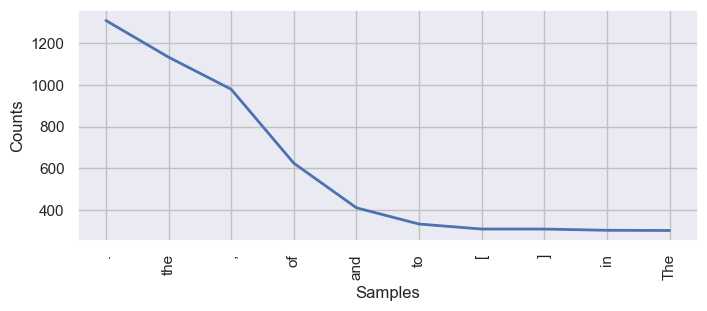

In [10]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

### 3.	Remove stop words and punctuation marks if necessary, and rerun the plot

In [11]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'only', 'mightn', 'should', 'yourself', 'below', 'there', 'further', 'ours', 'me', 'my', 's', 'yourselves', 'all', 'have', 'i', 'they', "we're", 'up', 'off', 'hadn', 'be', 'an', 'those', 'she', 'a', 'own', 'being', "shan't", "we'll", 'the', 'doing', "it's", 'did', "he'd", 'its', 'with', 'do', 'more', 'not', "mustn't", 'on', 'didn', 'such', 'through', 'll', 'how', 'too', 'won', 'you', "they'll", 'against', 'myself', 'other', 'o', 've', 'ourselves', 'no', 'd', "should've", "they're", 'were', 'haven', 'his', 'about', 'don', "wasn't", 'can', 'your', 'theirs', 't', 'themselves', 'again', 'it', "wouldn't", 'here', 'at', 'some', 'then', 'these', 'than', 'where', 'when', 'both', "he's", 'having', 'but', 'couldn', 'above', 'was', "she's", 'and', 'out', "she'll", "isn't", "he'll", 'y', 'nor', 'has', "you'd", 'very', "i'd", 're', 'any', 'as', 'into', 'so', 'what', "hasn't", 'ain', 'until', "won't", "didn't", "don't", 'their', 'her', 'shouldn', 'just', "it'll", 'who', "you're", 'aren', 'ma', 'of'

In [21]:
# Removing stopwords in words

filtered_words = [] 
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [22]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4824 samples and 16798 outcomes>


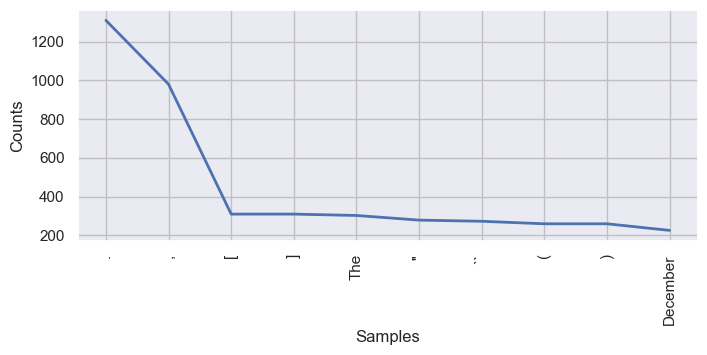

In [23]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

As we see, the most frequent tokens used are punctuations marks which deliver no information so they need to be filter out.

In [16]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",         # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [17]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)

In [18]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

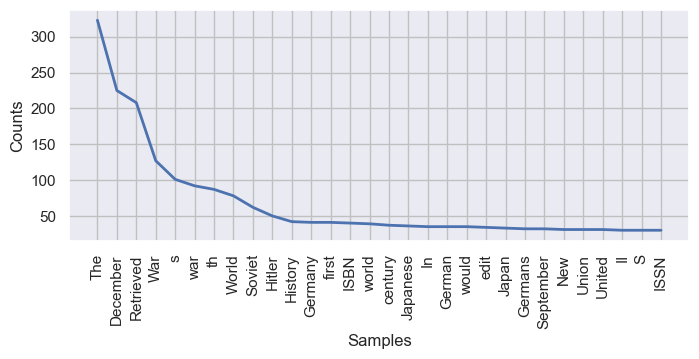

In [19]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

The most frequent words are 'the', 'December', 'retrived', and 'War', followed by other words such as 'world', 'soviet', 'history' and 'Germany'

In [26]:
dist_words_filter_2.most_common(30)

[('The', 323),
 ('December', 225),
 ('Retrieved', 208),
 ('War', 127),
 ('s', 101),
 ('war', 92),
 ('th', 87),
 ('World', 78),
 ('Soviet', 62),
 ('Hitler', 50),
 ('History', 42),
 ('Germany', 41),
 ('first', 41),
 ('ISBN', 40),
 ('world', 39),
 ('century', 37),
 ('Japanese', 36),
 ('In', 35),
 ('German', 35),
 ('would', 35),
 ('edit', 34),
 ('Japan', 33),
 ('Germans', 32),
 ('September', 32),
 ('New', 31),
 ('Union', 31),
 ('United', 31),
 ('II', 30),
 ('S', 30),
 ('ISSN', 30)]

### 4. Create a tags list using TextBlob

Remove a few more words and letters by adding them to the new_stopwords list

In [45]:
# Creat a list
new_stopwords = ["And", "Then", 'n', 't', 's', 'S', 'In', 'The', 'th']

In [46]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [47]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 12.9 ms


In [48]:
# Create an object called tags_list
tags_list = text.tags
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pagesSearchSearchAppearanceDonateCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'toolsDonate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),


In [51]:
#Store the tags list created in a dataframe to use pandas groupby function

df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [52]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [53]:
df_t = df_text.groupby('Word type').count().reset_index()
df_t.head()

,Word type,Words
0,CC,1
1,CD,78
2,DT,12
3,EX,13
4,FW,43


### 5.	Create a list of the Top 10 POS tags for words that appear in the article and plot the list in a bar chart

In [54]:
# By using the function nlargest() from pandas, you can narrow it down so that it only picks the largest 10 groups on the list.

top20 = df_t.nlargest(10, 'Words')

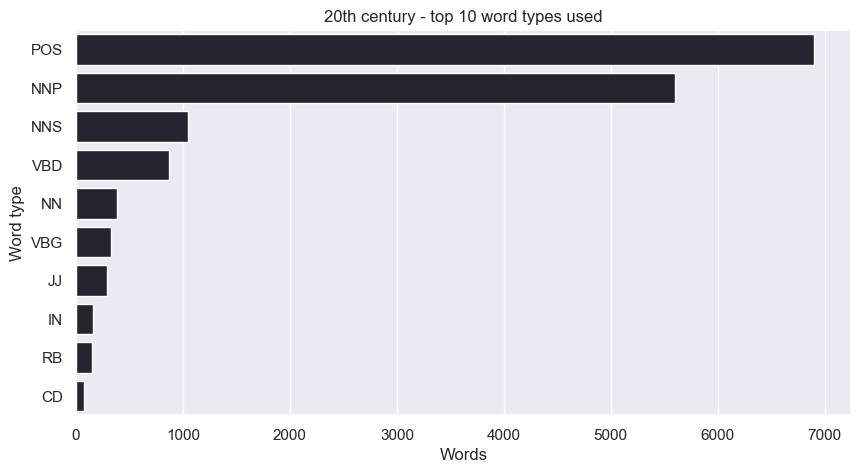

In [55]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("20th century - top 10 word types used")

Possessive endings, proper nouns, plurized nouns, and verbs are the top four word groups used in the article, followed closely by singular nouns.

### 6. Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives

#### NOUNS

In [58]:
# the nouns need to be filtered so that we’re looking for singular nouns (NN), pluralized nouns (NNS), and proper nouns (NNP)

df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [59]:
top15

,Word,Occurences
298,'December,225
1293,'War,127
2653,'war,92
1343,'World,78
1140,'Soviet,62
554,'Hitler,50
553,'History,42
1827,'first,41
580,'ISBN,40
2680,'world,39


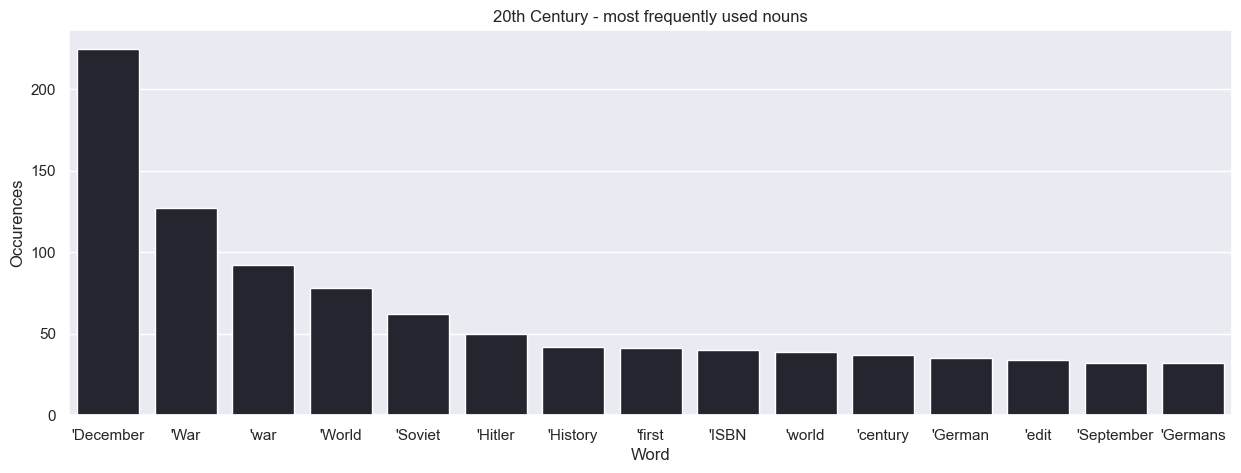

In [73]:
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("20th Century - most frequently used nouns")

The nouns mostly focus on war, countries and leaders like War, Soviet, Hitler, German and Germans.

There are also time markers and historical terms such as December, September, first, century and History that set the context.

#### VERBS

In [83]:
# Filtering the verbs as verb base form (VB), verb past tense (VBD)

df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')
top15

,Word,Occurences
28,'Retrieved,208
37,'United,31
0,'Allied,19
197,'led,15
1,'Archived,14
325,'used,13
195,'launched,12
93,'controlled,9
160,'forced,8
316,'turned,7


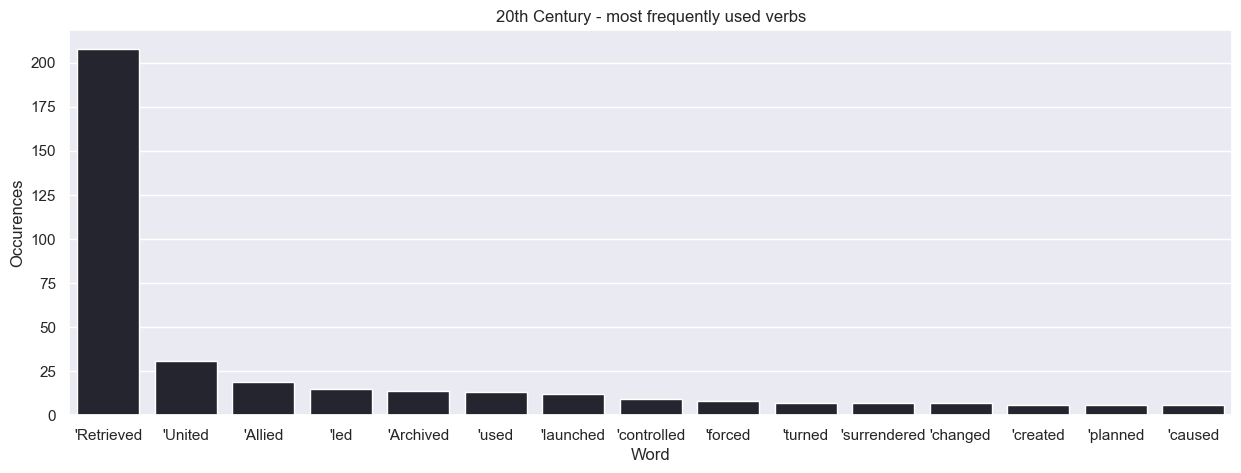

In [79]:
plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("20th Century - most frequently used verbs")

Most of the verbs are historical highlighting war, alliances, leadership and surrender.

They also reflect progress and change through actions such as launched, created, planned and changed that shaped the 20th century.

#### ADJECTIVES

In [80]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

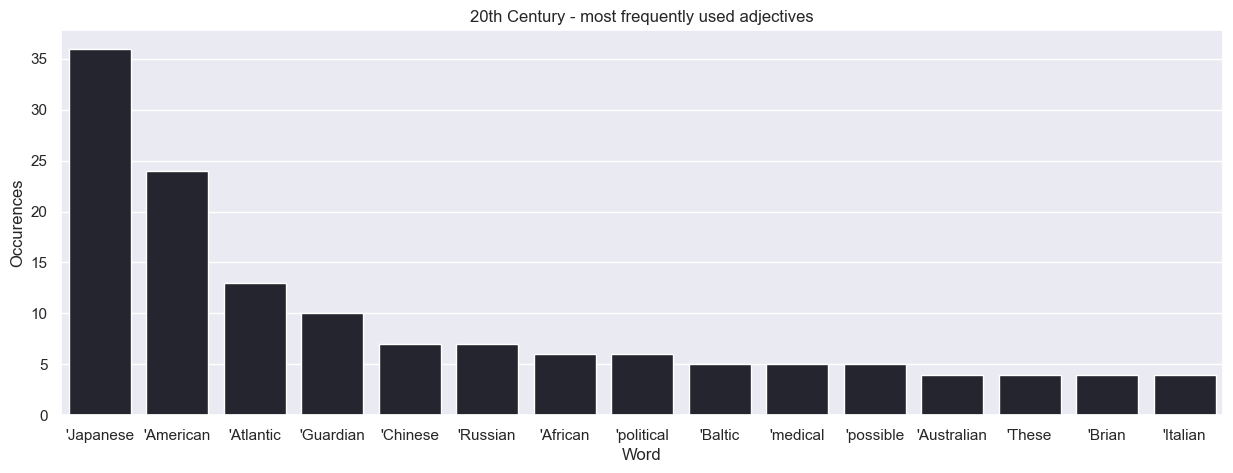

In [82]:
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("20th Century - most frequently used adjectives")

The top 15 adjectives are mostly nationalities of countries. It has also included "These" as demonstrative adjective.

### 7. Create a dataframe with the countries and the number of times they’re mentioned in your text 

#### The countries lookup list was scraped in advance

Let’s start by extracting all of the words from the tokenized data and counting how frequently they interact with each other.

In [115]:
#convert the filtered object that holds the word tokens in a string

listToStr = ' '.join([str(elem) for elem in filtered])

In [116]:
# Create a count for the main characters

#by using the regular expression W+ inside a Counter() function, store the results in a dictionary so that you can see
# how frequently each of the main characters appears

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [117]:
country = pd.read_csv("country_list.csv", index_col = 0)
country.head()

,Category,Country
0,A,Afghanistan
1,A,Albania
2,A,Algeria
3,A,Andorra
4,A,Angola


In [118]:
country = country.drop(columns=["Category"])
country.head()

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


In [119]:
# turn the column into a list
country_list = country['Country'].to_list()

In [120]:
#With the list ready, we can use the object all_counts to see how the frequencies of the strings look in the article

dict_of_counts = {d : all_counts[d] for d in country_list}
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 1,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cabo Verde': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 'China': 10,
 'Colombia': 0,
 'Comoros': 0,
 'Costa Rica': 0,
 "Côte d'Ivoire": 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czechia': 0,
 'Democratic Republic of the Congo': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 'Eswatini': 0,
 'Ethiopia': 0,
 'Fiji': 0,
 'Finland': 4,
 'F

In [121]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,13,0,0,0


In [122]:
df1 = df.transpose().reset_index()
df1

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
190,Venezuela,0
191,Vietnam,13
192,Yemen,0
193,Zambia,0


In [123]:
df1.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [124]:
df1

,Country,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
190,Venezuela,0
191,Vietnam,13
192,Yemen,0
193,Zambia,0


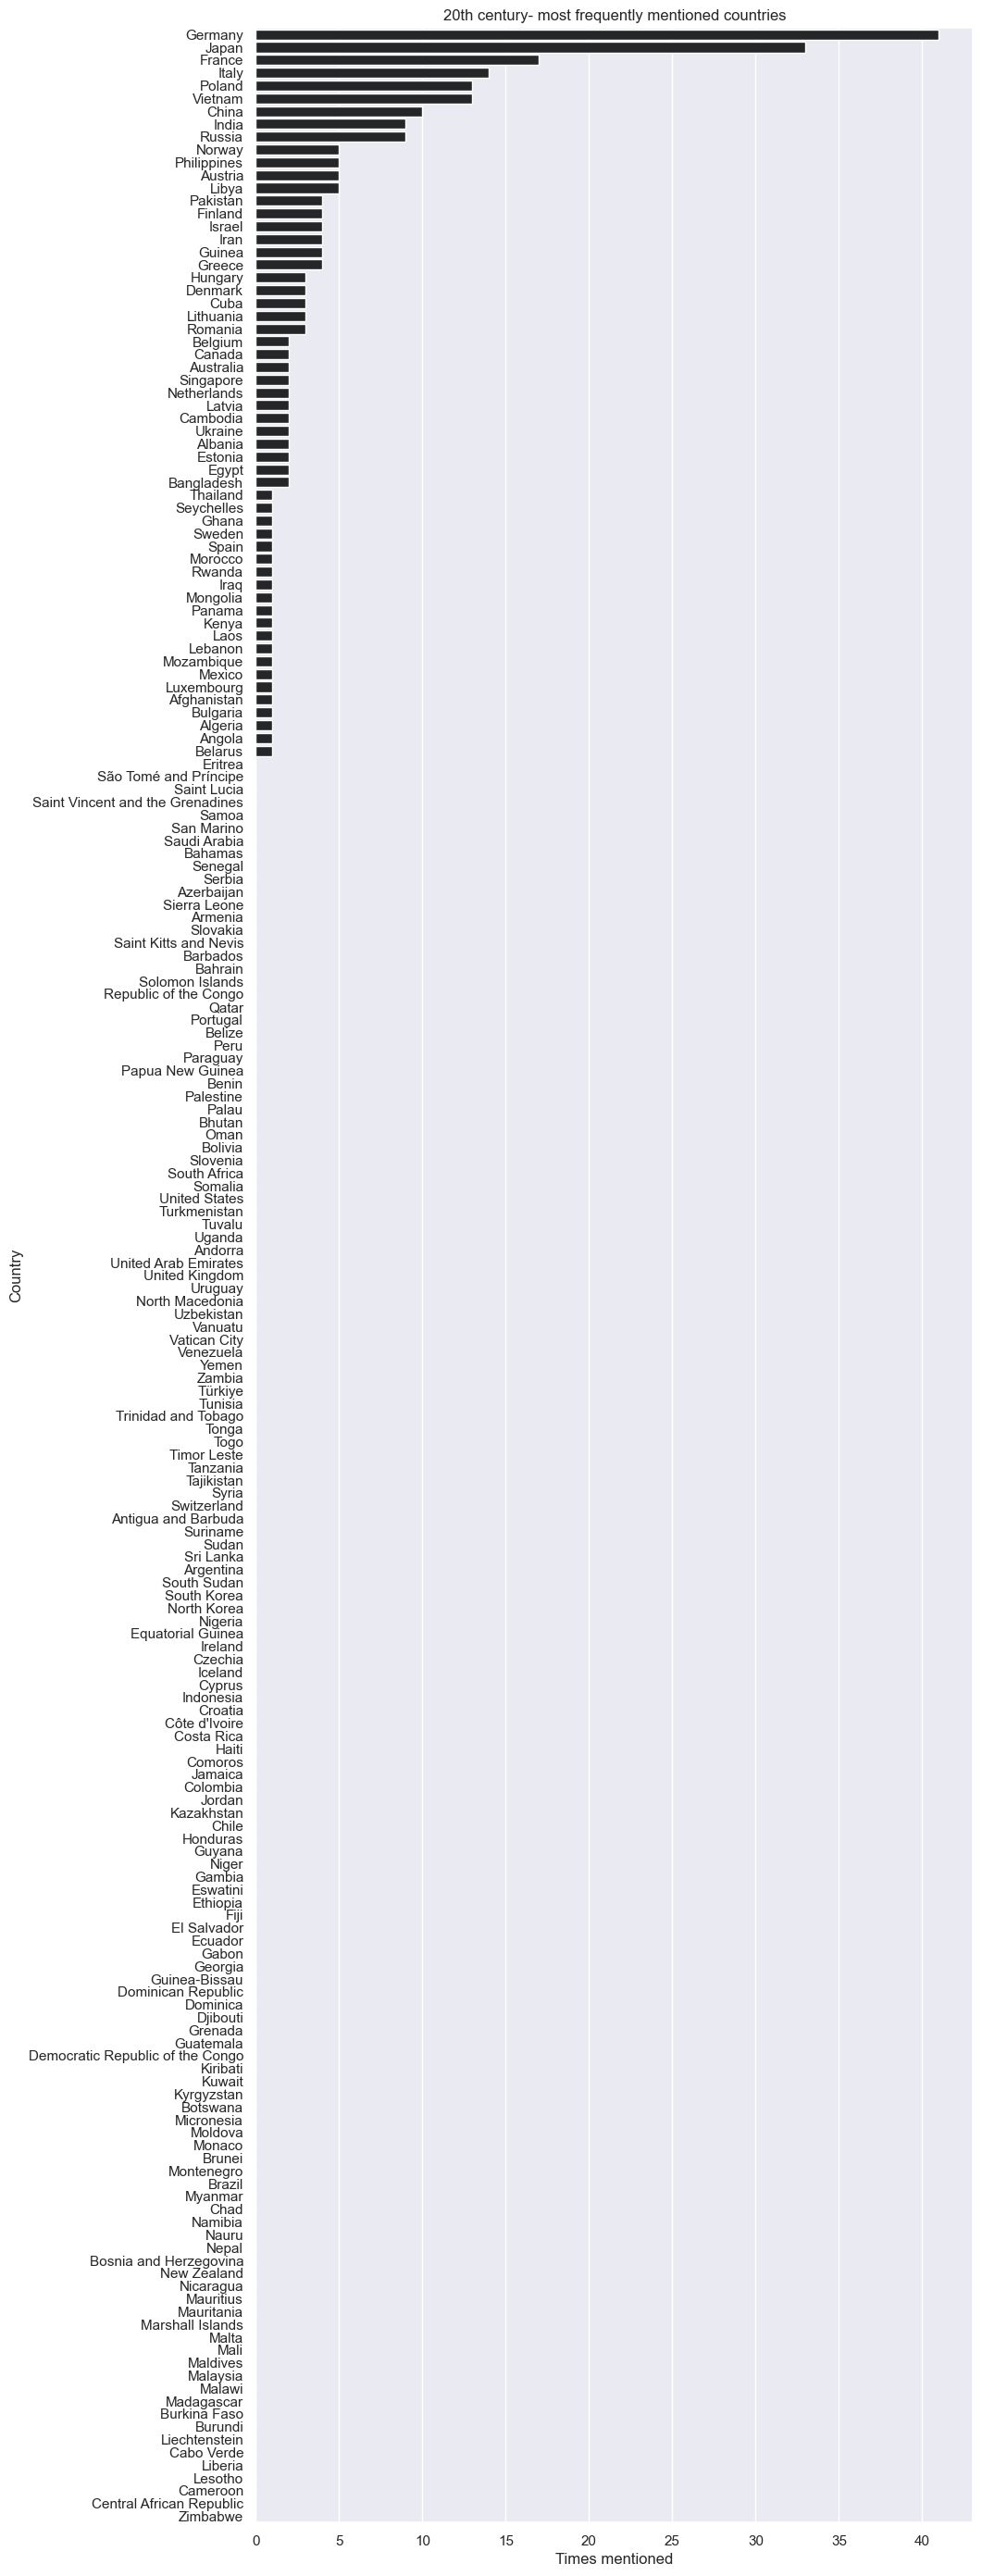

In [130]:
plt.figure(figsize=(10, 35))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Country",
    saturation=0.9, data = df1.sort_values("Times mentioned", ascending = False)).set_title("20th century- most frequently mentioned countries")

Germany is mentioned most often, likely because of the World Wars, followed by Japan, probably due to Hiroshima catastroph or its technological developments. Surprisingly, the United States is not mentioned at all, at least because of its role in the atomic bombing of Hiroshima!!!